## 1. 决策树的学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 1.1 基于RMSE绘制学习曲线

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()

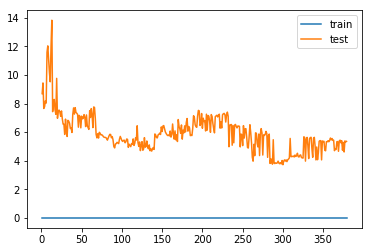

In [4]:
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

### 1.2 基于R^2绘制学习曲线

In [5]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], train_score, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()

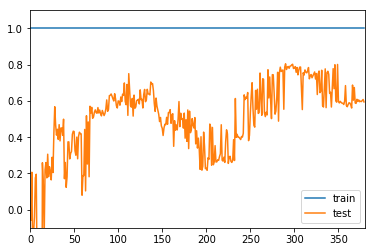

In [6]:
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

### 1.3 提高非参数学习泛化能力(以max_depth为例)

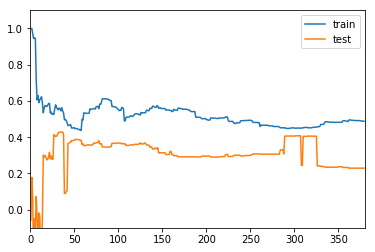

In [7]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

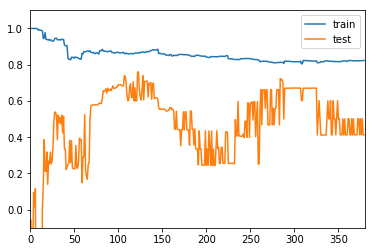

In [8]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

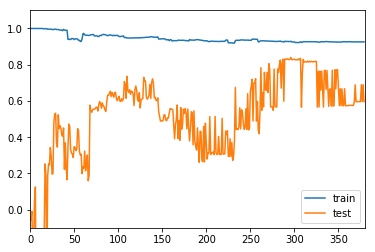

In [9]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

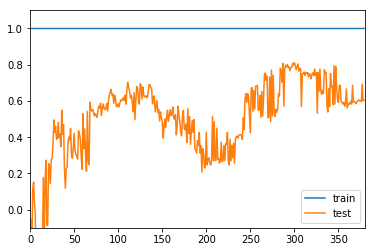

In [10]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=20), X_train, X_test, y_train, y_test)

## 2. 模型复杂度曲线

In [11]:
boston = datasets.load_boston()
X = boston.data
y = boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [12]:
X.shape

(506, 13)

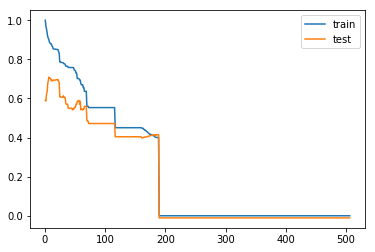

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
#     train_scores.append(dt_reg.score(X_train, y_train))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
#plt.xlim(506, 1)
plt.legend()
plt.show()

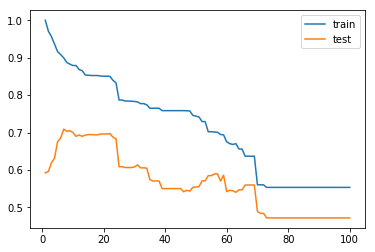

In [17]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
# plt.xlim(maxSampleLeaf, 1)
plt.legend()
plt.show()

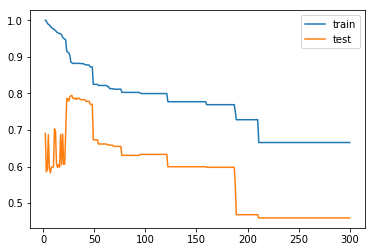

In [18]:
maxSamplesSplit = 300
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
# plt.xlim(maxSamplesSplit, 2)
plt.legend()
plt.show()